# Pokemon Go Visualization

### Import library

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read dataset from my local file

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


### Dataset assessment

In [0]:
import io
pkmn = pd.read_csv(io.BytesIO(uploaded['Pokemon.csv']))
pkmn.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


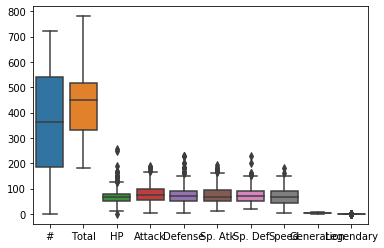

In [0]:
# Using boxplot to check the variables
sns.boxplot(data=pkmn)

In [0]:
# Number, total, generation and legendary should not be included...
pkmn1 = pkmn.drop(['Total', '#', 'HP', 'Speed', 'Generation', 'Legendary'],1)

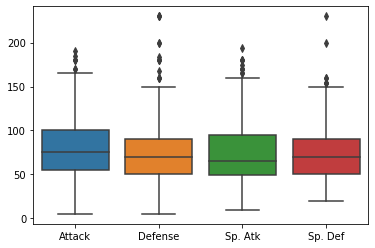

In [0]:
sns.boxplot(data=pkmn1)

In [0]:
# Data transformation
pkmn2 = pd.melt(pkmn1, id_vars=["Name", "Type 1", "Type 2"], var_name="Stat")

In [0]:
pkmn2.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,Attack,49
1,Ivysaur,Grass,Poison,Attack,62
2,Venusaur,Grass,Poison,Attack,82
3,VenusaurMega Venusaur,Grass,Poison,Attack,100
4,Charmander,Fire,NaN,Attack,52


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


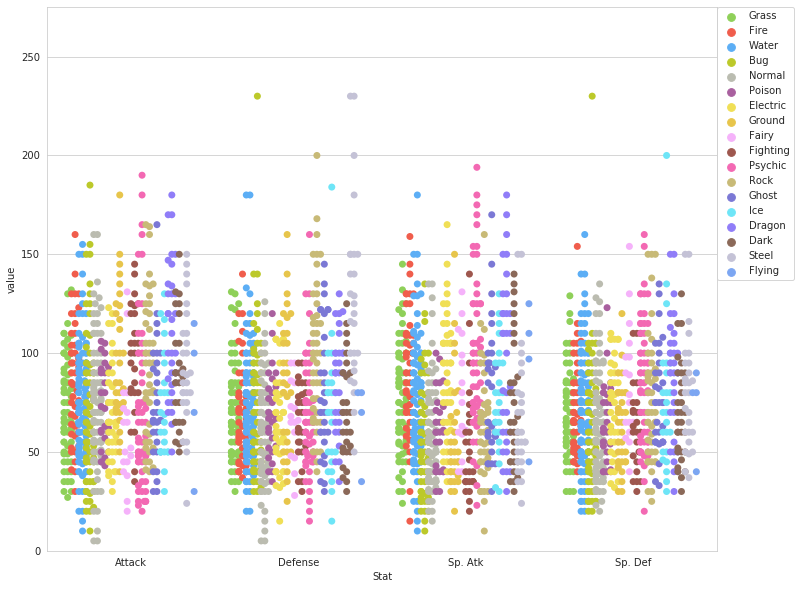

In [0]:
sns.set_style("whitegrid")
with sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 275)
    sns.swarmplot(x="Stat", y="value", data=pkmn2, hue="Type 1", split=True, size=7)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

In [0]:
pkmn4 = pkmn.drop(['Total', '#'],1)

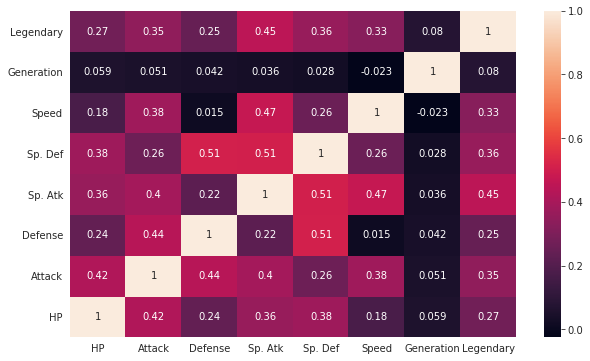

In [0]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(pkmn4.corr(),annot=True)
ax.set_ylim(0, 8)
plt.show()

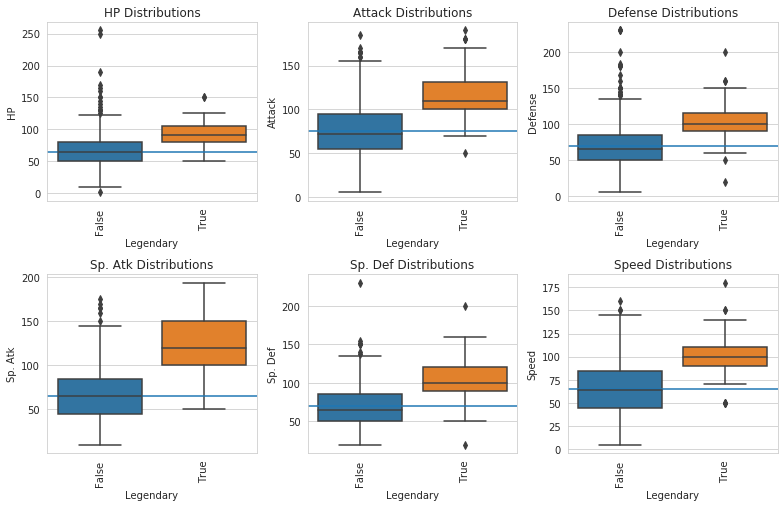

In [0]:
stats = pkmn.columns[5:11]
plt.figure(figsize=(11,10))
for ii, stat in enumerate(stats):
    title = "{stat} Distributions".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    plt.xticks(rotation=90)
    sns.boxplot(x='Legendary', y=stat, data = pkmn)
    plt.axhline(pkmn[stat].median())
    
plt.tight_layout()
plt.show()